In [22]:
import os
import random
from collections import Counter

import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt, font_manager, rcParams


In [23]:
BASE_DATA_DIR = f"./data/word_nglegena_20260102_155715"
CSV_PATH = f"{BASE_DATA_DIR}/label.csv"
IMG_DIR = f"{BASE_DATA_DIR}/image"

FONT_SIZE = 64
TARGET_HEIGHT = 64
PADDING = 2

BASE_FONT_DIR = f"./fonts"
FONT_PATH = {
    "Noto Sans Javanese Regular": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/static/NotoSansJavanese-Regular.ttf",
    # "Noto Sans Javanese Bold": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/static/NotoSansJavanese-Bold.ttf",
    # "Noto Sans Javanese Medium": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/static/NotoSansJavanese-Medium.ttf",
    # "Noto Sans Javanese SemiBold": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/static/NotoSansJavanese-SemiBold.ttf",
    # "Noto Sans Javanese Variable": f"{BASE_FONT_DIR}/Noto_Sans_Javanese/NotoSansJavanese-VariableFont_wght.ttf",
    "AB Bakul": f"{BASE_FONT_DIR}/AB Bakul-Aditya Bayu-aksaradinusantara/AB bakul.ttf",
    "AB Wulang": f"{BASE_FONT_DIR}/AB Wulang-Aditya Bayu-aksaradinusantara/AB wulang.otf",
    # "Adipati Genk": f"{BASE_FONT_DIR}/Adipati genk-Adipati Genk Kobra-aksaradinusantara/Adipati Genk.ttf",
    "AR Demak Beta": f"{BASE_FONT_DIR}/AR Demak-Arif Budiarto-aksaradinusantara/ARDemakbeta-Regular.ttf",
    # "AR Demak Draft": f"{BASE_FONT_DIR}/AR Demak-Arif Budiarto-aksaradinusantara/Demak-draft.ttf",
    "CARAKAN JAWA": f"{BASE_FONT_DIR}/CARAKAN JAWA-Sudarto Hs_Ki Demang Sokowaten-aksaradinusantara/CARAKAN JAWA.otf",
    "Damarwulan": f"{BASE_FONT_DIR}/Damarwulan-Arif Budiarto-aksaradinusantara/damarwulan-bw.ttf",
    "Dhuwung": f"{BASE_FONT_DIR}/Font Dhuwung-Apri Nugroho-aksaradinusantara/File Font Aksara Jawa/DHUWUNG.ttf",
    # "Genk-Kobra Elysanti": f"{BASE_FONT_DIR}/Genk Kobra Elysanti-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra Elysanti rev.ttf",
    # "Genk-Kobra Java": f"{BASE_FONT_DIR}/Genk Kobra Java-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra Java rev.ttf",
    # "Genk-Kobra Javaholic": f"{BASE_FONT_DIR}/Genk Kobra Javaholic-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra Jawa rev.ttf",
    # "Genk-Kobra JeJe": f"{BASE_FONT_DIR}/Genk Kobra JeJe-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra JeJe Rev.ttf",
    # "Genk-Kobra Ndomblong": f"{BASE_FONT_DIR}/Genk Kobra Ndomblong-Adipati Genk Kobra-aksaradinusantara/Genk-Kobra ndomblong Rev.ttf",
    # "Gerbangpraja": f"{BASE_FONT_DIR}/Gerbangpraja Genk Kobra-Adipati Genk Kobra-aksaradinusantara/gerbangpraja.ttf",
    # "Gumregah New": f"{BASE_FONT_DIR}/Gumregah-Apri Nugroho-aksaradinusantara/Gumregah New.ttf",
    "Gumregah New FULL": f"{BASE_FONT_DIR}/Gumregah-Apri Nugroho-aksaradinusantara/Gumregah New FULL.ttf",
    "Jamawi": f"{BASE_FONT_DIR}/Jamawi-Arif Budiarto-aksaradinusantara/jamawi-v1r0.ttf",
    # "Javabugida": f"{BASE_FONT_DIR}/Javabugida Mahayu-Ervyn Raven-aksaradinusantara/javabugida_0001.otf",
    # "Java Genk-Kobra": f"{BASE_FONT_DIR}/Javaholic Genk-Adipati Genk Kobra-aksaradinusantara/Java Genk-Kobra Rev.ttf",
    "Nawatura Beta": f"{BASE_FONT_DIR}/Nawatura-Aditya Bayu-aksaradinusantara/Nawatura beta.ttf",
    # "Nawatura Beta Android": f"{BASE_FONT_DIR}/Nawatura-Aditya Bayu-aksaradinusantara/Nawatura beta android2.ttf",
    "Nayaka New": f"{BASE_FONT_DIR}/Nayaka-Apri Nugroho-aksaradinusantara/Nayaka New 2022.ttf",
    "New Kramawirya": f"{BASE_FONT_DIR}/New Kramawirya-Yayat Suhiryatna-aksaradinusantara/New Kramawirya1.ttf",
    "Nyk Ngayogyan Jejeg": f"{BASE_FONT_DIR}/nyk Ngayogyan Jejeg-Apri Nugroho-aksaradinusantara/nyk Ngayogyan Jejeg.ttf",
    "Nyk Ngayogyan New Italic": f"{BASE_FONT_DIR}/nyk Ngayogyan-Apri Nugroho-aksaradinusantara/nyk Ngayogyan New Italic.ttf",
    "Sehulbari": f"{BASE_FONT_DIR}/Sehulbari-Arif Budiarto-aksaradinusantara/Sehulbari.ttf",
    "Tuladha Jejeg": f"{BASE_FONT_DIR}/Tuladha Jejeg-R. S. Wihananto-aksaradinusantara/TuladhaJejeg_gr.ttf",
    "Djoharuddin": f"{BASE_FONT_DIR}/Djoharuddin-Aditya Bayu-aksaradinusantara.ttf",
}


font_manager.fontManager.addfont(FONT_PATH["Noto Sans Javanese Regular"])
rcParams["font.family"] = font_manager.FontProperties(fname=FONT_PATH["Noto Sans Javanese Regular"]).get_name()


Jumlah variasi font:  17


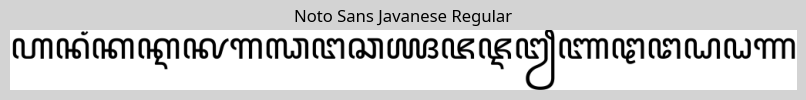

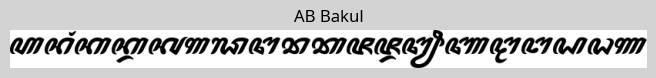

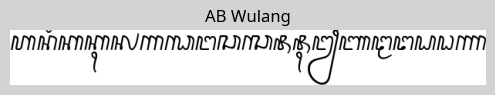

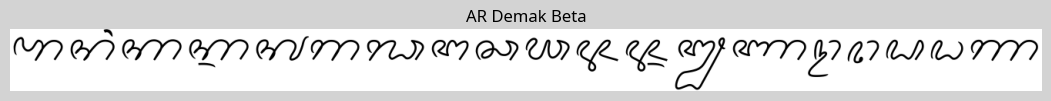

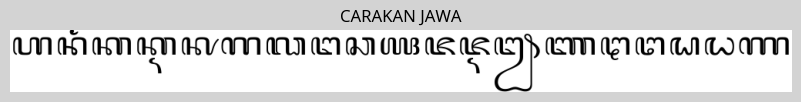

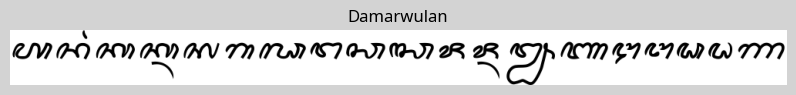

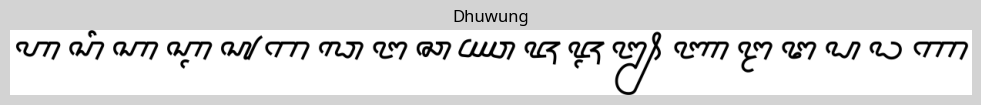

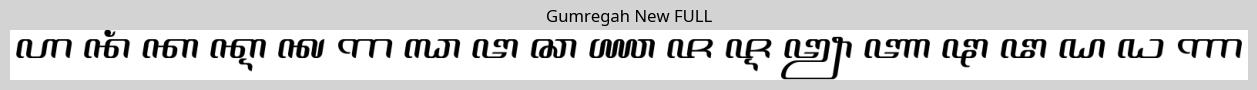

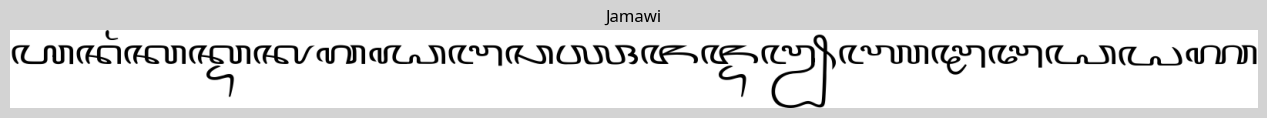

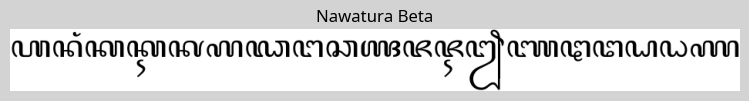

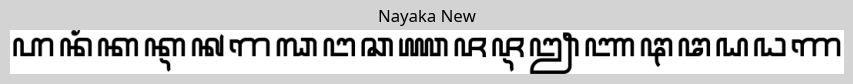

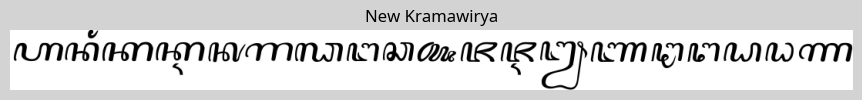

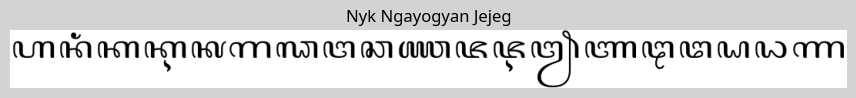

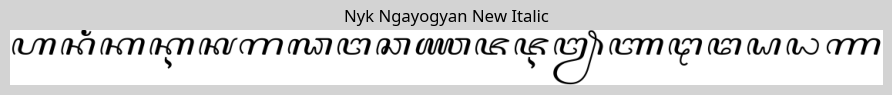

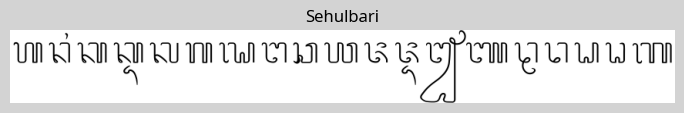

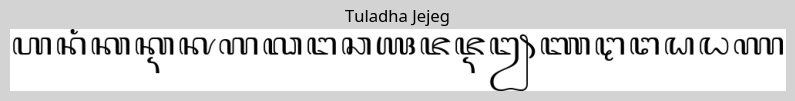

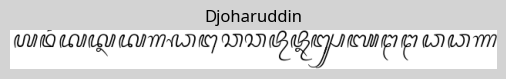

In [24]:
print("Jumlah variasi font: ", len(FONT_PATH))

sample_text = "ꦲꦤꦁꦏꦐꦑꦒꦓꦔꦕꦖꦗꦘꦙꦚꦛꦜꦝꦞꦟ"
for font_name, font_path in FONT_PATH.items():
    try:
        font = ImageFont.truetype(font_path, 48)
    except Exception as e:
        print(f"Failed to load font {font_name}: {e}")
        continue

    dummy = Image.new("RGB", (1, 1))
    draw_dummy = ImageDraw.Draw(dummy)
    bbox = draw_dummy.textbbox((0, 0), sample_text, font=font)
    w = bbox[2] - bbox[0]
    h = bbox[3] - bbox[1]

    img = Image.new("RGB", (w, h), color=(255, 255, 255))
    draw = ImageDraw.Draw(img)

    draw.text((-bbox[0], -bbox[1]), sample_text, font=font, fill=(0, 0, 0))

    plt.figure(figsize=(w/100, h/100), facecolor='lightgray')
    plt.imshow(np.array(img))
    plt.title(font_name)
    plt.axis("off")
    plt.show()


Font usage counts:
Dhuwung: 66
AB Wulang: 64
CARAKAN JAWA: 64
AR Demak Beta: 61
Damarwulan: 60
Nayaka New: 56
AB Bakul: 56
New Kramawirya: 56
Noto Sans Javanese Regular: 55
Gumregah New FULL: 55
Nyk Ngayogyan Jejeg: 54
Nawatura Beta: 54
Tuladha Jejeg: 54
Nyk Ngayogyan New Italic: 53
Jamawi: 51
Sehulbari: 51
Djoharuddin: 47


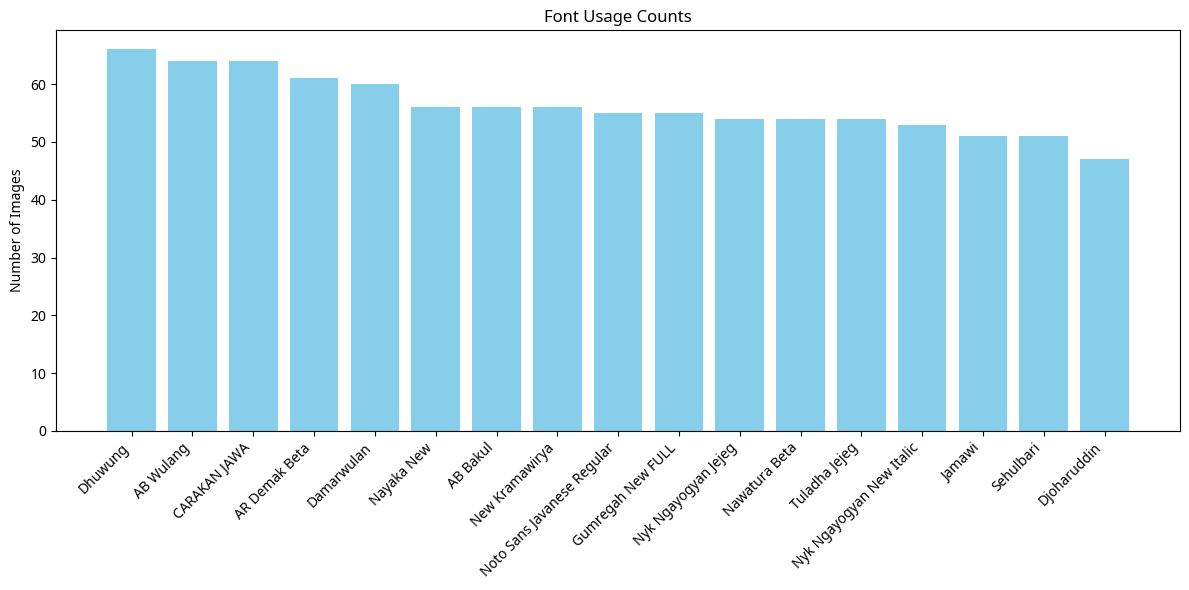

In [25]:
def render_aksara_image(
    text: str,
    font_path: str,
    font_size: int = 64,
    target_height: int = 64,
    padding: int = 4,
    bg: int = 255,
    fg: int = 0,
):
    font = ImageFont.truetype(font_path, font_size)

    dummy = Image.new("L", (1, 1), bg)
    draw_dummy = ImageDraw.Draw(dummy)
    bbox = draw_dummy.textbbox((0, 0), text, font=font)
    w = bbox[2] - bbox[0]
    h = bbox[3] - bbox[1]

    padded_w = w + 2 * padding
    padded_h = h + 2 * padding

    img = Image.new("L", (padded_w, padded_h), bg)
    draw = ImageDraw.Draw(img)

    draw.text((padding - bbox[0], padding - bbox[1]), text, fill=fg, font=font)

    if target_height is not None:
        new_w = max(1, int(padded_w * target_height / padded_h))
        img = img.resize((new_w, target_height), Image.BILINEAR)

    return img



os.makedirs(IMG_DIR, exist_ok=True)
df = pd.read_csv(CSV_PATH)

font_names_list = list(FONT_PATH.keys())
font_paths_list = list(FONT_PATH.values())
coverage = Counter()



if "font_used" not in df.columns:
    df["font_used"] = ""

for i, (_, row) in enumerate(df.iterrows()):
    inv_coverage = [1 / (coverage[name] + 1) for name in font_names_list]
    random_font_path = random.choices(font_paths_list, weights=inv_coverage, k=1)[0]
    selected_font_name = font_names_list[font_paths_list.index(random_font_path)]
    coverage[selected_font_name] += 1

    img = render_aksara_image(
        text=row["transcription"],
        font_path=random_font_path,
        font_size=FONT_SIZE,
        target_height=TARGET_HEIGHT,
        padding=PADDING
    )

    out_path = os.path.join(IMG_DIR, row["image"])
    img.save(out_path)

    df.at[i, "font_used"] = selected_font_name



df.to_csv(CSV_PATH, index=False)

print("Font usage counts:")
for font_name, count in coverage.most_common():
    print(f"{font_name}: {count}")

fonts = [font for font, _ in coverage.most_common()]
counts = [count for _, count in coverage.most_common()]

plt.figure(figsize=(12, 6))
plt.bar(fonts, counts, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Images")
plt.title("Font Usage Counts")
plt.tight_layout()
plt.show()

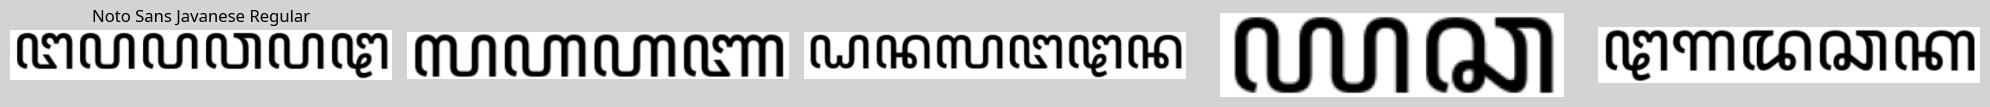

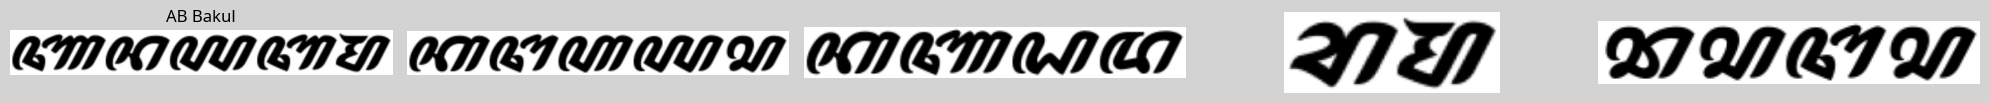

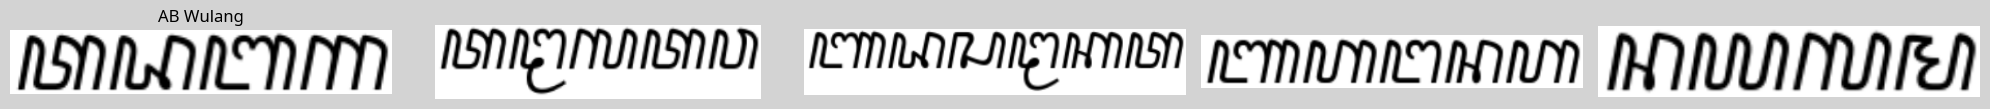

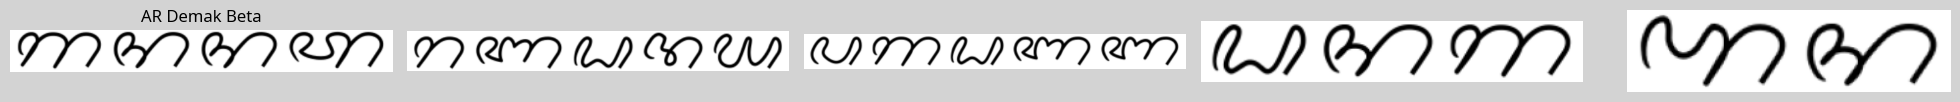

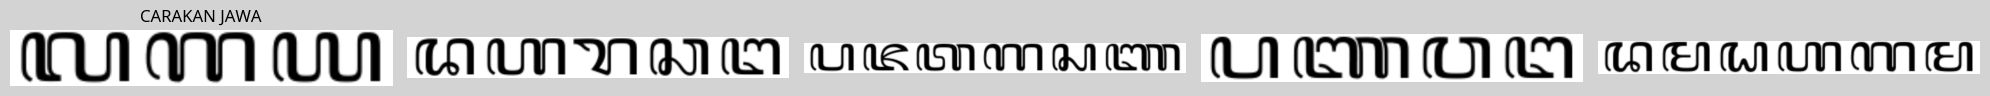

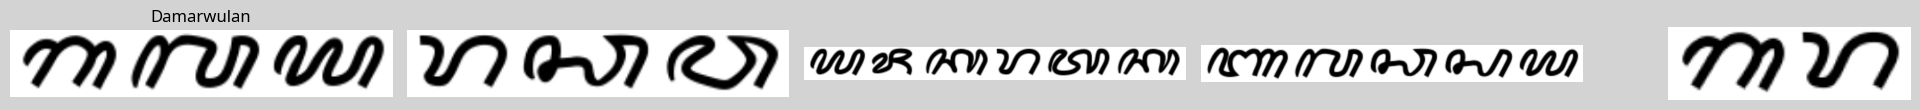

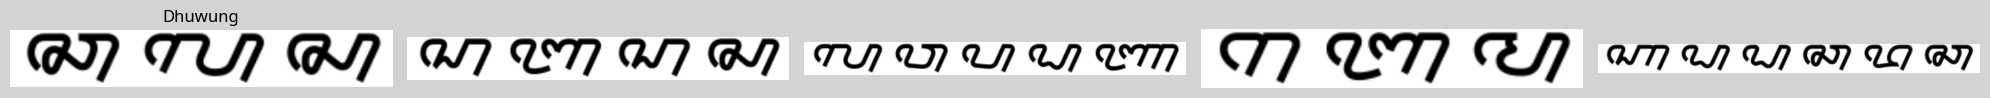

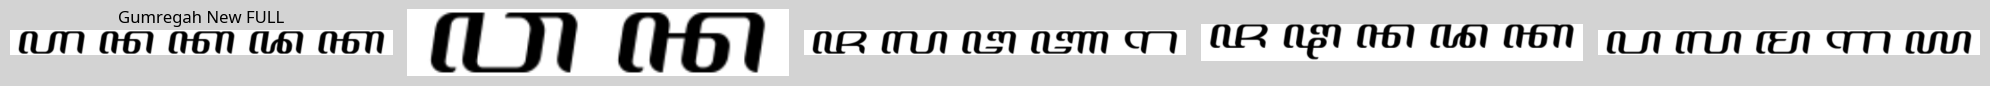

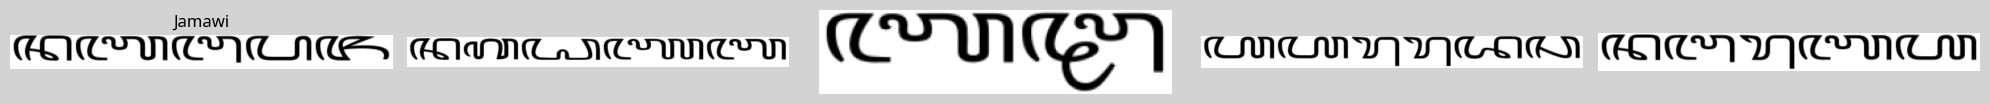

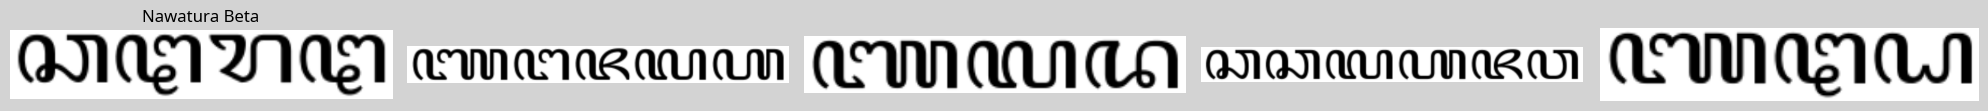

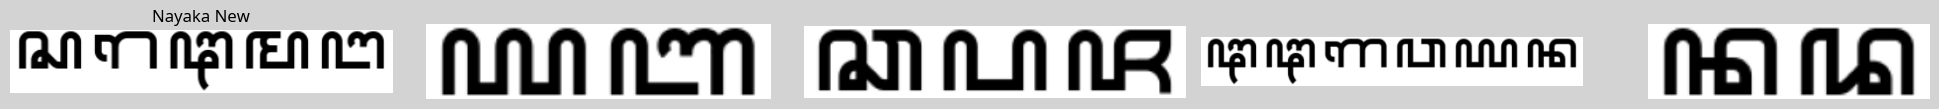

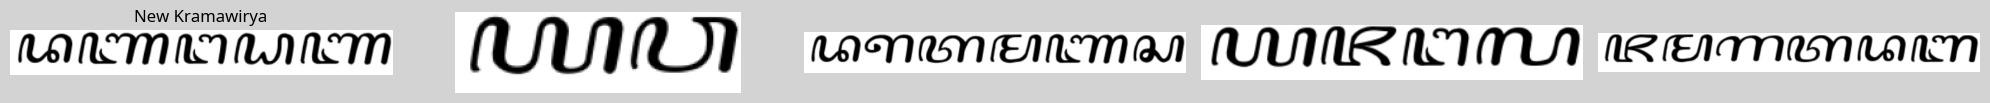

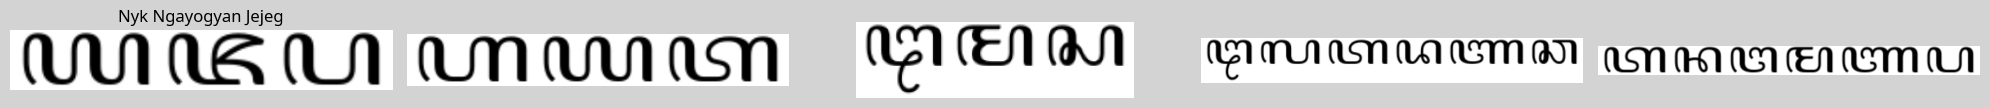

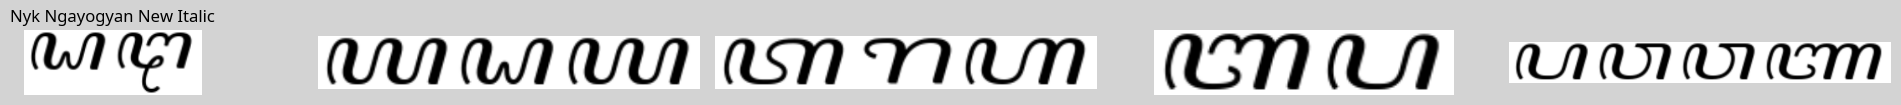

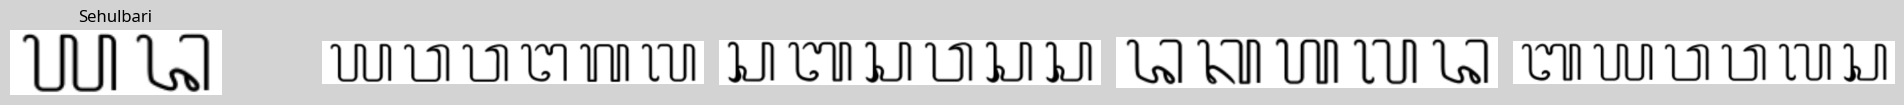

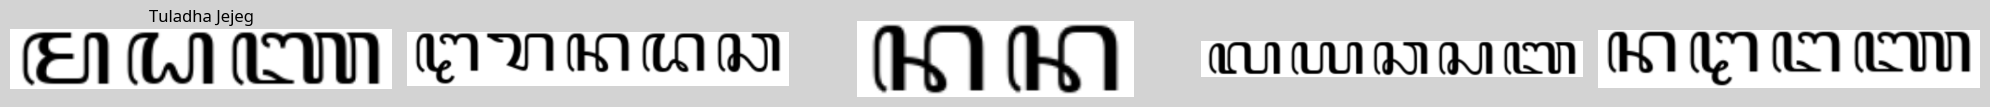

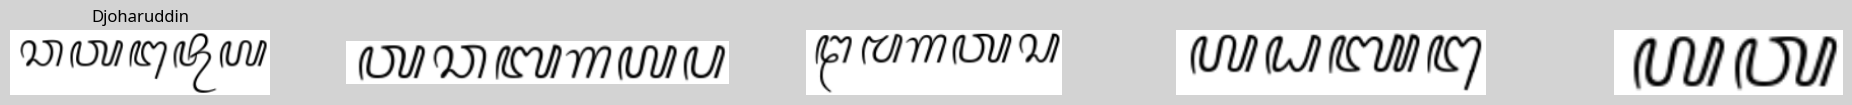

In [26]:
font_to_images = {font_name: [] for font_name in FONT_PATH.keys()}
for i, row in df.iterrows():
    image_path = os.path.join(IMG_DIR, row["image"])
    selected_font = row["font_used"]
    font_to_images[selected_font].append(image_path)



for idx, (font_name, img_list) in enumerate(font_to_images.items()):
    plt.figure(figsize=(20, len(FONT_PATH)), facecolor='lightgray')
    samples = random.sample(img_list, min(5, len(img_list)))
    for jdx, img_path in enumerate(samples):
        img = Image.open(img_path)
        ax = plt.subplot(len(FONT_PATH), 5, idx * 5 + jdx + 1)
        ax.imshow(img, cmap="gray")
        ax.axis("off")
        if jdx == 0:
            ax.set_title(font_name, fontsize=12)
    plt.tight_layout()
    plt.show()
